In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
# Como a popularidade média das músicas mudou de 2000 a 2019?
pop_media = df.groupby('year')['popularity'].mean().reset_index()
pop_media

,year,popularity
0,1998,49.000000
1,1999,64.921053
2,2000,58.554054
3,2001,59.407407
4,2002,62.400000
5,2003,58.793814
6,2004,58.427083
7,2005,61.759615
8,2006,57.389474
9,2007,59.925532


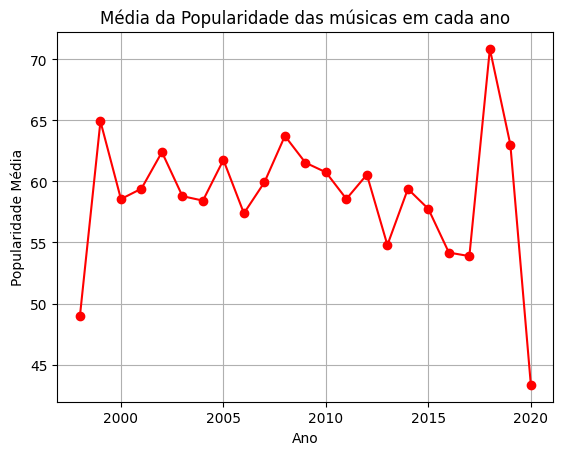

In [6]:
plt.plot(pop_media['year'], pop_media['popularity'], marker='o', color='red')
plt.title('Média da Popularidade das músicas em cada ano')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid(True)
plt.show()

In [7]:
# Quais são os 10 gêneros mais comuns entre as principais faixas do Spotify?

top_genres = df['genre'].value_counts().head(10).reset_index().sort_values(by='count')


[(0.993248, 0.906157, 0.143936, 1.0), (0.741388, 0.873449, 0.149561, 1.0), (0.477504, 0.821444, 0.318195, 1.0), (0.266941, 0.748751, 0.440573, 1.0), (0.134692, 0.658636, 0.517649, 1.0), (0.128729, 0.563265, 0.551229, 1.0), (0.163625, 0.471133, 0.558148, 1.0), (0.206756, 0.371758, 0.553117, 1.0), (0.253935, 0.265254, 0.529983, 1.0), (0.282623, 0.140926, 0.457517, 1.0)]


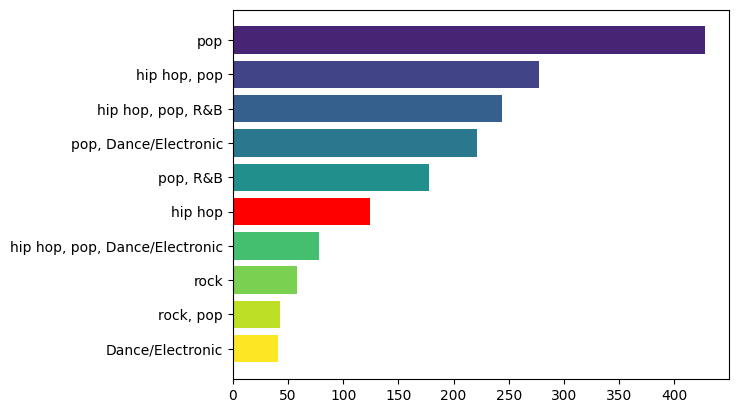

In [8]:
colormap = plt.cm.viridis_r
colors = [colormap(i/10) for i in range(10)]
print(colors)

colors[4] = 'red'

plt.barh(width='count', y='genre', data=top_genres, color=colors)
plt.show()

[(0.993248, 0.906157, 0.143936, 1.0), (0.741388, 0.873449, 0.149561, 1.0), (0.477504, 0.821444, 0.318195, 1.0), (0.266941, 0.748751, 0.440573, 1.0), (0.134692, 0.658636, 0.517649, 1.0), (0.128729, 0.563265, 0.551229, 1.0), (0.163625, 0.471133, 0.558148, 1.0), (0.206756, 0.371758, 0.553117, 1.0), (0.253935, 0.265254, 0.529983, 1.0), (0.282623, 0.140926, 0.457517, 1.0)]


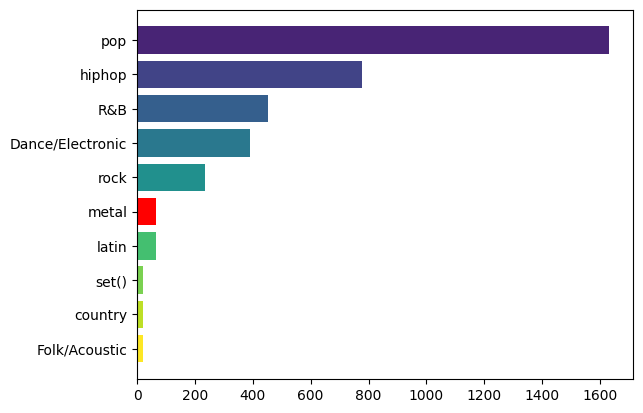

In [9]:
df_novo = df.copy()

df_novo['genre'] = df_novo['genre'].str.replace(' ', '').str.split(',')
df_novo = df_novo.explode('genre')


top_genres = df_novo['genre'].value_counts().head(10).reset_index().sort_values(by='count')
colormap = plt.cm.viridis_r
colors = [colormap(i/10) for i in range(10)]
print(colors)

colors[4] = 'red'

plt.barh(width='count', y='genre', data=top_genres, color=colors)
plt.show()

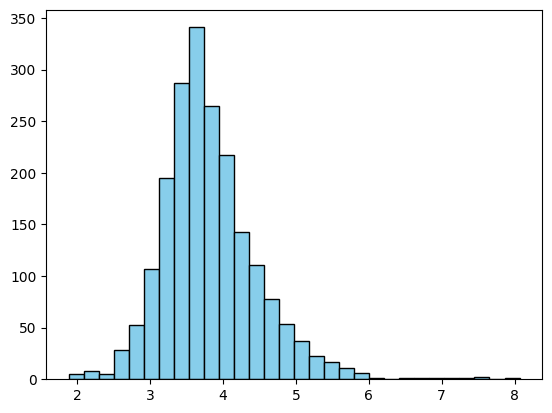

In [10]:
# Qual é a distribuição das durações das músicas entre as principais faixas do Spotify?

df['duration_min'] = df['duration_ms'] / 60000
plt.hist(df['duration_min'], bins=30, edgecolor='black', color='skyblue')
plt.show()

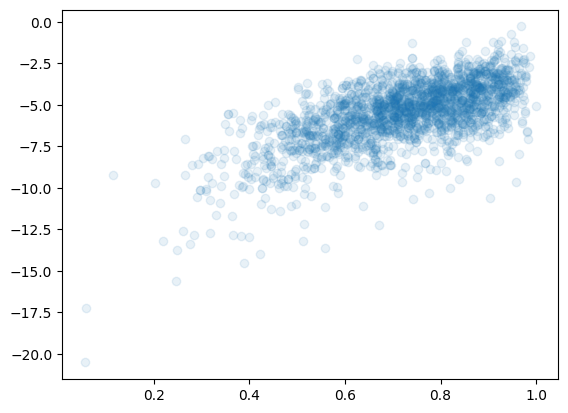

In [11]:
# Como a energia de uma faixa se relaciona com o seu volume?

plt.scatter(df['energy'], df['loudness'], alpha=0.1)
plt.show()

In [12]:
df.corr(numeric_only=True)

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603,1.000000
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221,0.123595
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867,-0.316534
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288,0.050617
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418,-0.060057
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719,-0.078763
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431,-0.002560
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709,-0.079912
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434,-0.003848
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747,0.066998


In [13]:
import seaborn as sns

<Axes: >

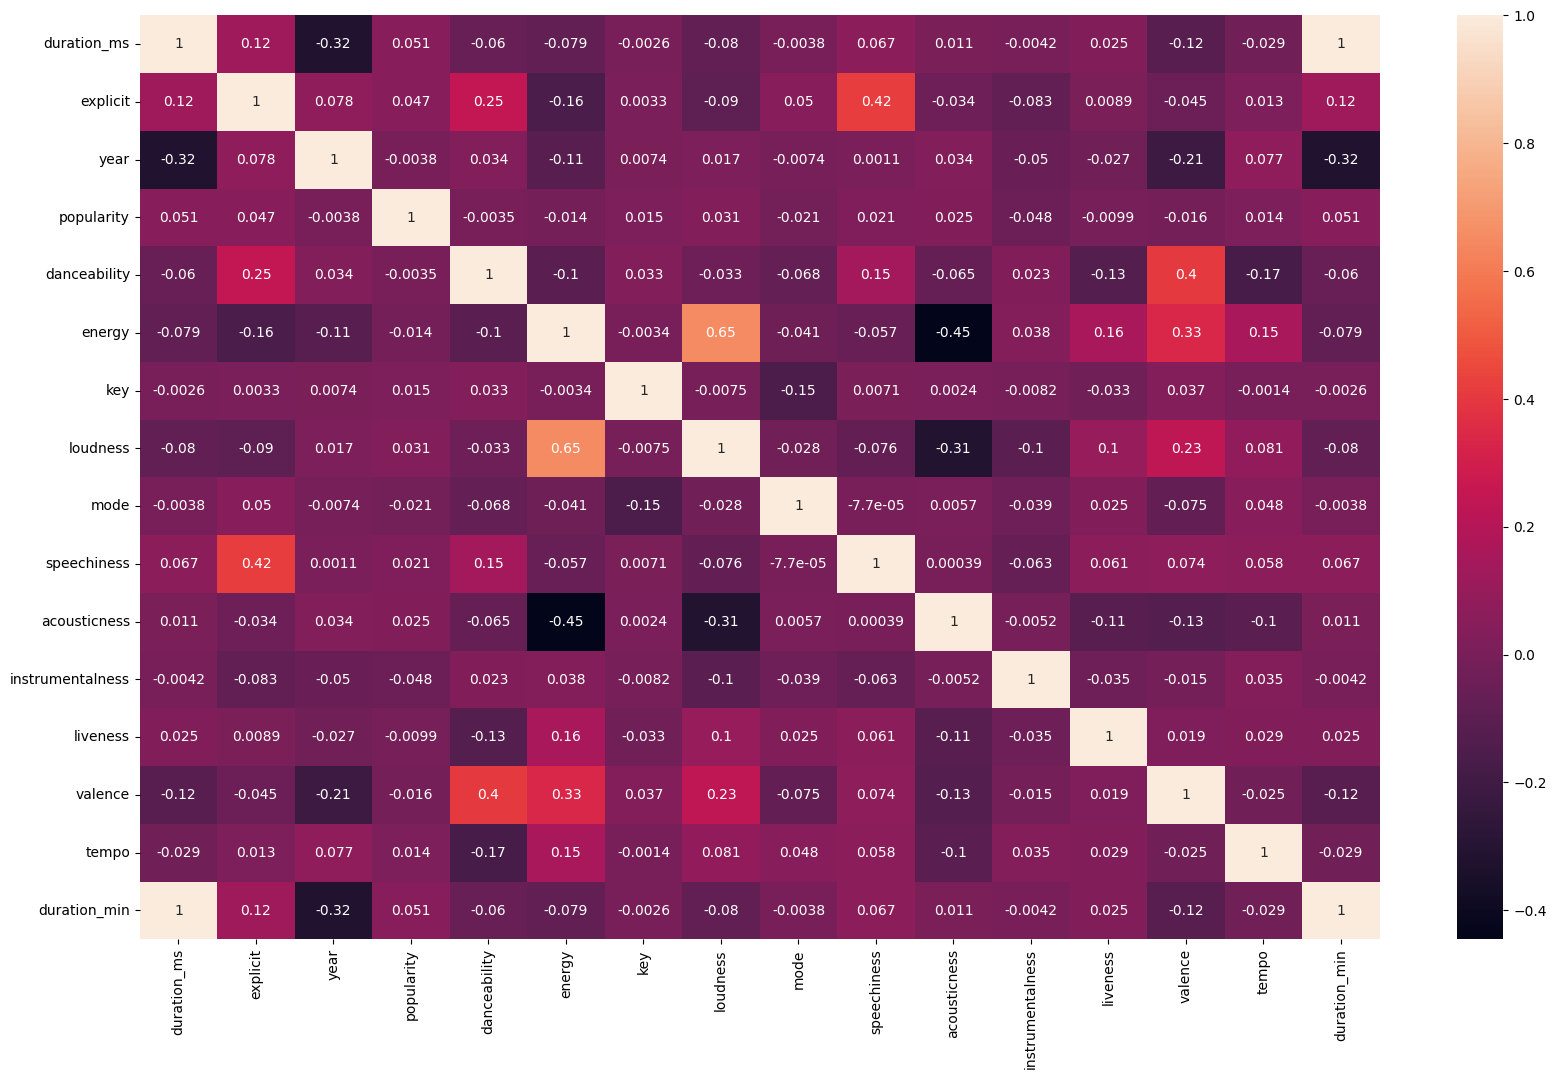

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

Text(0.5, 1.02, 'Características de audio')

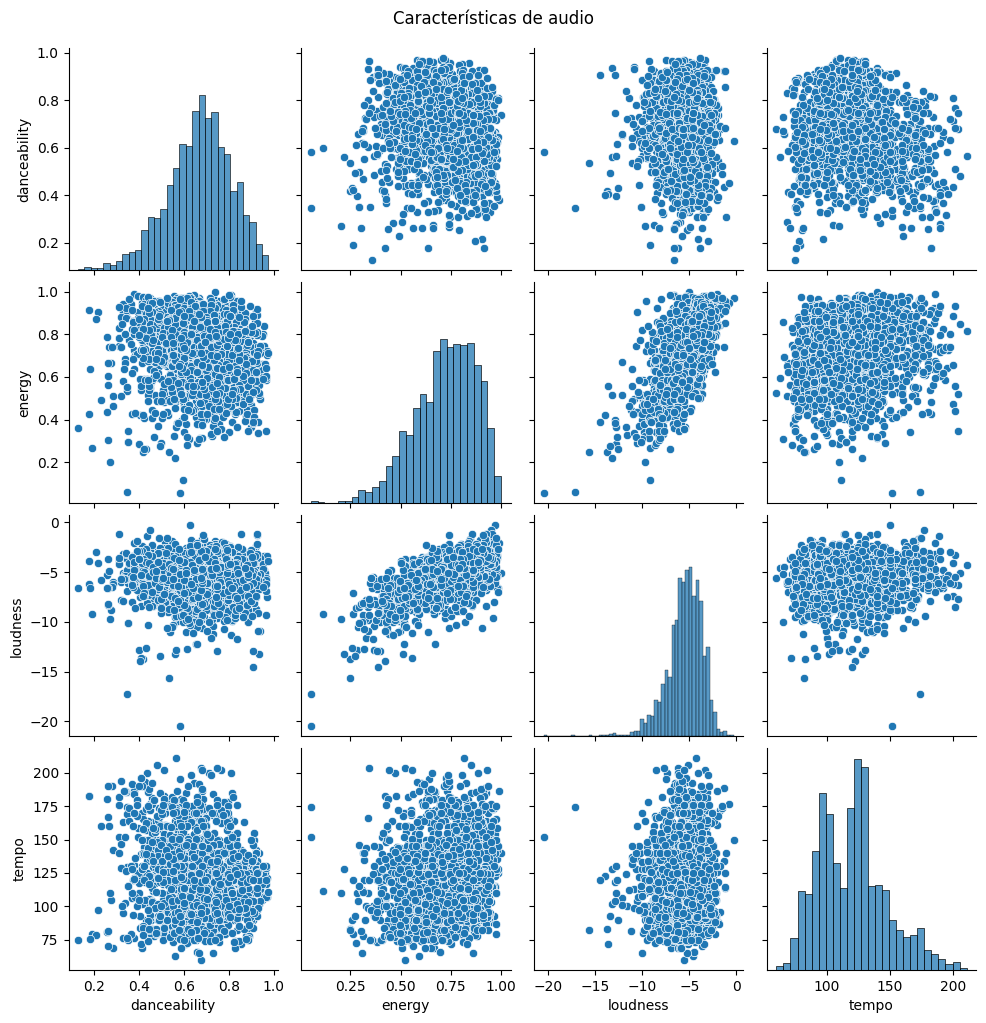

In [17]:
# Como várias características de áudio (como dançabilidade, energia, volume e tempo) interagem entre si nas principais músicas?
caracteristicas = ['danceability', 'energy', 'loudness', 'tempo']
sns.pairplot(df[caracteristicas])
plt.suptitle('Características de audio', y=1.02)

<Axes: xlabel='acousticness'>

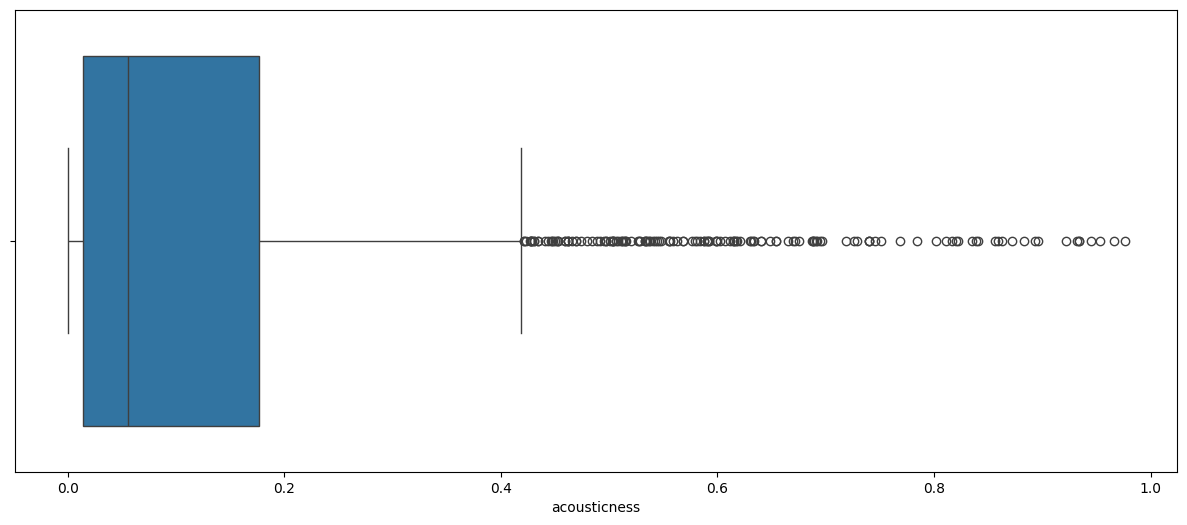

In [19]:
# Qual é a preferência entre acústica e eletrônica no top Spotify?
plt.figure(figsize=(15,6))
sns.boxplot(x='acousticness', data=df)

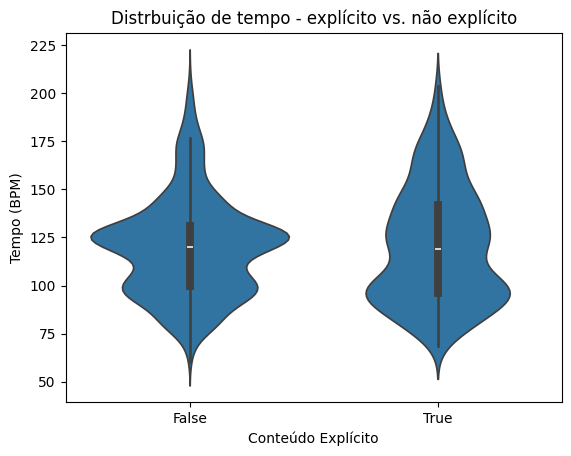

In [21]:
#Como é a distribuição do tempo entre músicas explícitas e não explícitas?
sns.violinplot(x='explicit', y='tempo', data=df)
plt.title('Distrbuição de tempo - explícito vs. não explícito')
plt.xlabel('Conteúdo Explícito')
plt.ylabel('Tempo (BPM)')
plt.show()

<Axes: xlabel='explicit', ylabel='energy'>

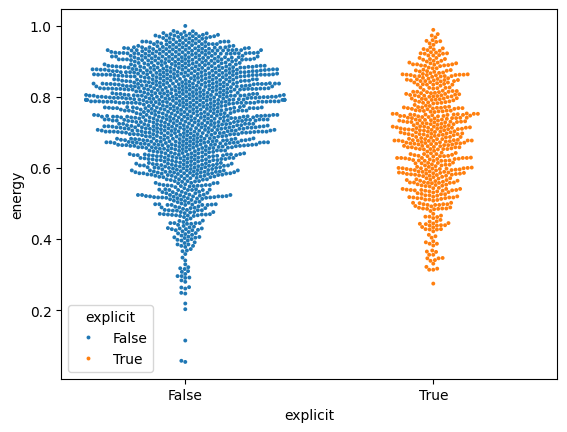

In [27]:
# Como os níveis de energia se comparam entre músicas explícitas e não explícitas?
sns.swarmplot(x='explicit', y='energy', data=df, hue='explicit', size=2.8)

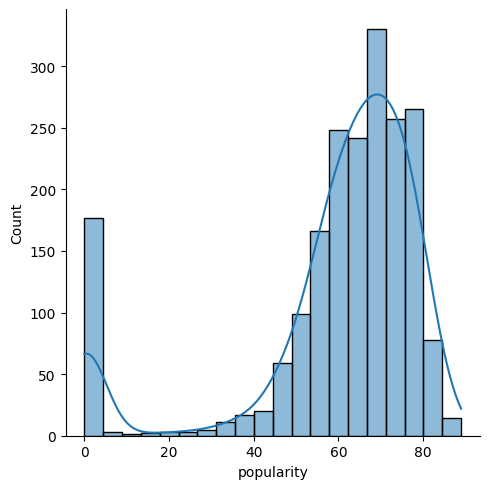

In [39]:
# Qual é a estimativa de densidade kernel da popularidade das músicas?
# DIST != DIS

sns.displot(df['popularity'], bins=20, kde=True)


<Axes: xlabel='acousticness', ylabel='Density'>

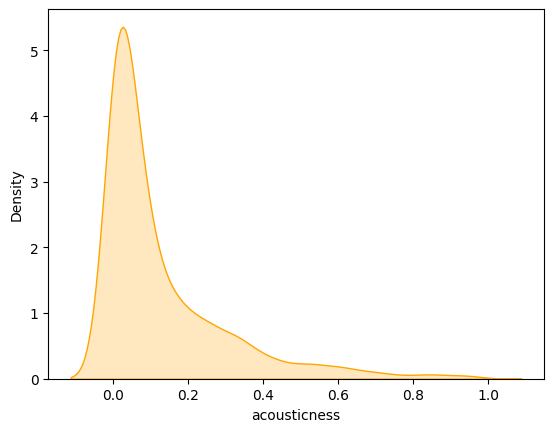

In [42]:
# Como a acústica está distribuída entre as músicas?
sns.kdeplot(df['acousticness'], fill=True, color='orange')

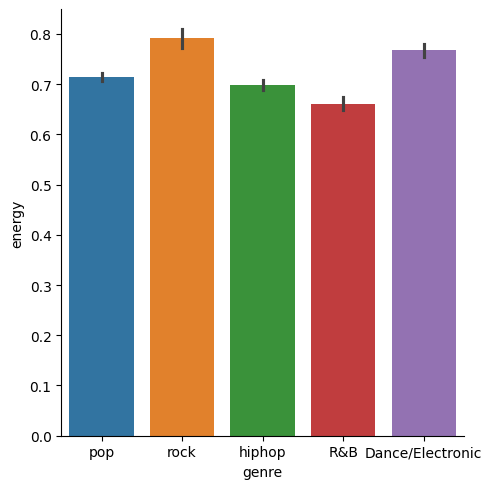

In [56]:
# Qual é o nível médio de energia dentro dos 5 gêneros mais comuns?
top_5_generos = df_novo['genre'].value_counts().head(5).index.to_list()
df_top_5_generos = df_novo[df_novo['genre'].isin(top_5_generos)]

sns.catplot(x='genre', y='energy', kind='bar', data=df_top_5_generos, hue='genre', estimator='mean')